<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/13_Images_Fuzzy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title

#@title
%%capture
!pip install scikit-fuzzy

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

sns.set_theme()
sns.set_style("whitegrid")
sns.set_style("ticks")

def summary(image):
	if image.ndim == 2:
		SUM = ('\n{0:>10s}: {1:>15.4f}').format('min', np.amin(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('1st Quar', np.percentile(image, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('median', np.median(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('mean', np.mean(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('3rd Quar', np.percentile(image, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('max', np.amax(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('sigma', np.std(image))
	elif image.ndim == 3:
		R = image[:,:,0]
		G = image[:,:,1]
		B = image[:,:,2]
		SUM = ('{0:>%ss} {1:>%ss} {2:>%ss}' % (27, 15, 15)).format('R', 'G', 'B')
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('min', np.amin(R), np.amin(G), np.amin(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('1st Quar', np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('median', np.median(R), np.median(G), np.median(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('mean', np.mean(R), np.mean(G), np.mean(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('3rd Quar', np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('max', np.amax(R), np.amax(G), np.amax(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('sigma', np.std(R), np.std(G), np.std(B))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	print(SUM)

def histogram(image, **kwargs):
	x, y = (3*(256 + 100), 256) if 'dims' not in kwargs else kwargs['dims']
	dpi = 72 if 'dpi' not in kwargs else kwargs['dpi']
	bins = 256 if 'bins' not in kwargs else kwargs['bins']
	rw = 0.95 if 'rw' not in kwargs else kwargs['rw']
	interval = [0, 255] if 'interval' not in kwargs else kwargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	
	gs1 = gridspec.GridSpec(1, 3)
	gs1.update(	left=0,
				right=1,
				bottom=0,
				top=1,
				wspace=0,
				hspace=0)
	ax1 = plt.subplot(gs1[:, 0])
	ax1.axis('off')
	ax2 = plt.subplot(gs1[:, 1:])

	img = image.copy()

	if img.ndim == 2:
		ax1.imshow(	img,
					cmap='gray',
					vmin=interval[0],
					vmax=interval[1])
		ax2.hist(	img.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					color='k')
	elif img.ndim == 3:
		imgo = (img - interval[0])/(interval[1] - interval[0])
		imgo[imgo < 0] = 0
		imgo[imgo > 1] = 1

		R = img[:,:,0]
		G = img[:,:,1]
		B = img[:,:,2]

		ax1.imshow(imgo);
		ax2.hist(	R.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(1, 0, 0.0, 0.7))
		ax2.hist(	G.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0.0, 1, 0, 0.7))
		ax2.hist(	B.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0, 0.0, 1, 0.7))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	plt.show()

def panel(images, gspec, **kargs):
	M, N = gspec

	x, y = (1024, 512) if 'dims' not in kargs else kargs['dims']
	dpi = 72 if 'dpi' not in kargs else kargs['dpi']
	texts = [] if 'texts' not in kargs else kargs['texts']
	tx, ty = (10, 10) if 'text_pos' not in kargs else kargs['text_pos']
	tc = 'white' if 'text_color' not in kargs else kargs['text_color']
	ts = 12 if 'text_size' not in kargs else kargs['text_size']
	interval = [0, 255] if 'interval' not in kargs else kargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	gs = gridspec.GridSpec(N, M)
	gs.update(	left=0, right=1,
                bottom=0, top=1,
                wspace=0, hspace=0)
	images = (images - interval[0])/(interval[1] - interval[0])
	images[images < 0] = 0
	images[images > 1] = 1
	for n in range(N):
		for m in range(M):
			ax = plt.subplot(gs[n, m])
			ax.axis('off')
			try:
				image = images[n*M + m]
			except:
				image = images[0]*0
			if image.ndim == 2:
				ax.imshow(image, cmap='gray')
			else:
				ax.imshow(image)
			try:
				text = texts[n*M + m]
			except:
				text = ''
			ax.text(	tx, ty, text,
						color=tc, size=ts,
						horizontalalignment='left',
						verticalalignment='top')
	plt.show()

<a name="tartalom"></a>

## Fuzzy Histogram Kiegyenlítés

Bevezetés

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

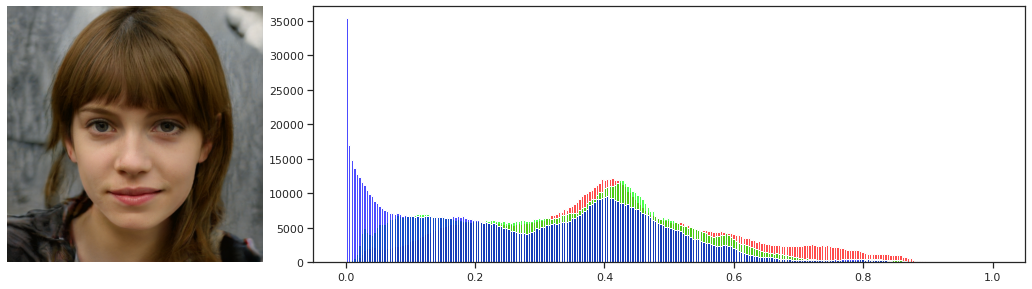

In [3]:
# Képek betöltése
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255
histogram(A, bins=2**8, interval=[0, 1])

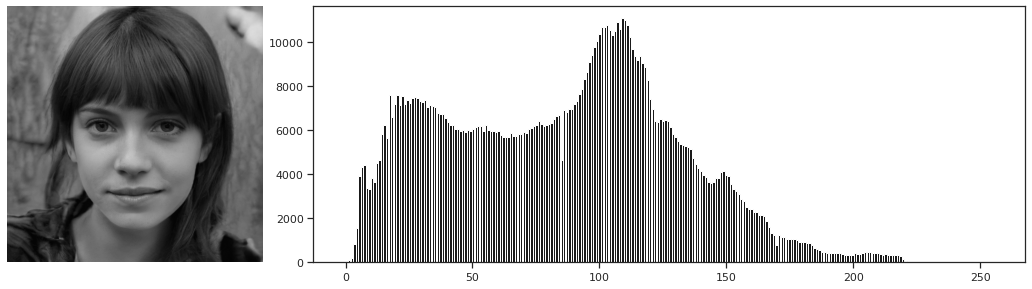

In [4]:
Gray = ((A[:,:,0] + A[:,:,1] + A[:,:,2])/3)*255
histogram(Gray, bins=2**8, interval=[0, 255])

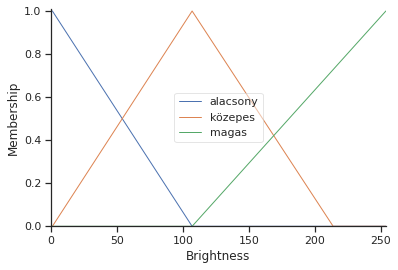

In [139]:
a = 1
b = 254
c = 107

Brightness       = ctrl.Antecedent(np.arange(0, 255, 1), 'Brightness')

Brightness.defuzzify_method = 'centroid'
Brightness.universe.mean()

Brightness['alacsony'] = fuzzy.trapmf(Brightness.universe, [0, 0, a, c])
Brightness['közepes'] = fuzzy.trimf(Brightness.universe, [a, c, b-40])
Brightness['magas'] = fuzzy.trapmf(Brightness.universe, [c, b, 255, 255])

Brightness.view()

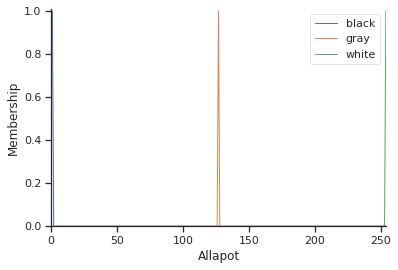

In [140]:
Allapot         = ctrl.Consequent(np.arange(0, 255, 1), 'Allapot')

Allapot.defuzzify_method = 'centroid'
Allapot.universe.mean()

Allapot['black'] = fuzzy.trapmf(Allapot.universe, [0, 0, 1, 1])
Allapot['gray']  = fuzzy.trimf(Allapot.universe, [126, 127, 128])
Allapot['white'] = fuzzy.trimf(Allapot.universe, [253, 254, 255])

Allapot.view()

In [141]:
rule1 = ctrl.Rule(antecedent= Brightness['alacsony'], consequent = Allapot['black'])
rule2 = ctrl.Rule(antecedent= Brightness['közepes'], consequent = Allapot['gray'])
rule3 = ctrl.Rule(antecedent= Brightness['magas'], consequent = Allapot['white'])

----------------------------------------
Állapot  : 207.89410292915773
----------------------------------------
Brightness : 200.0



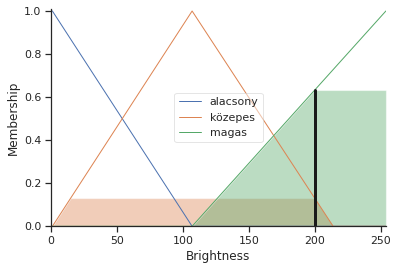

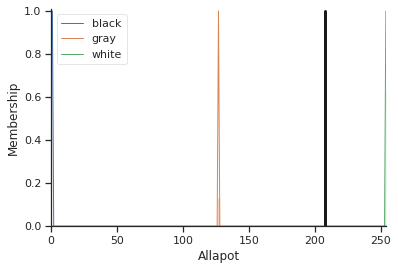

In [142]:

system = ctrl.ControlSystem([rule1, rule2, rule3])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['Brightness'] = 200.0

simulation.compute()

print('----------------------------------------')
print('Állapot  :', simulation.output['Allapot'])
print('----------------------------------------')
print(simulation.input)

Brightness.view(sim = simulation)
Allapot.view(sim = simulation)

In [143]:
def transform(value):

  simulation.input['Brightness'] = value

  simulation.compute()

  return int(simulation.output['Allapot'])


In [144]:
transform(100)

112

In [145]:
transform(127)

141

In [146]:
transform(200)

207

(128, 128)


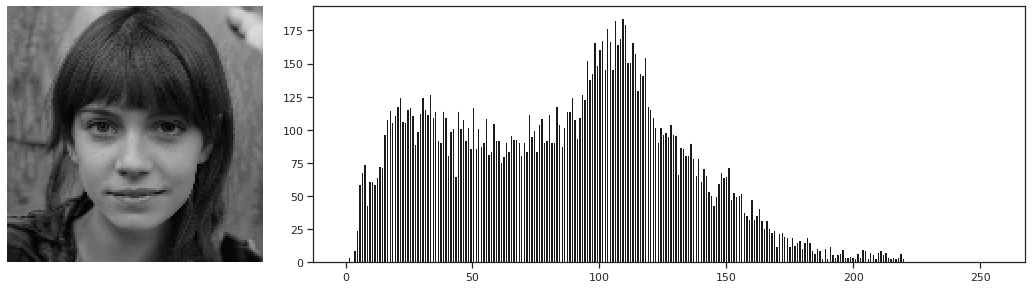

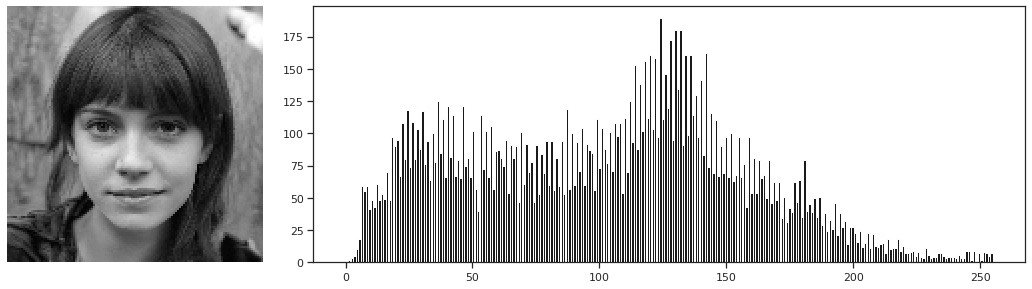

In [147]:
i = Gray.copy()

i = i[::8,::8]

print(i.shape)

histogram(i, bins=2**8, interval=[0, 255])

scale = lambda x: x * 1.2

f = scale(i)

histogram(f, bins=2**8, interval=[0, 255])


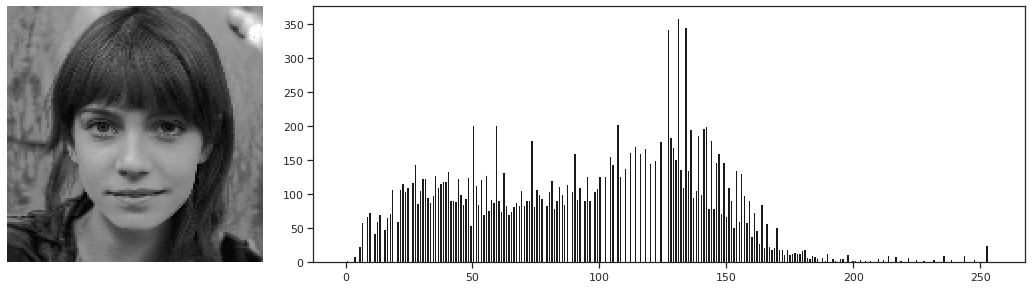

In [148]:
f = i.copy()
for a in range(i.shape[0]):
  for b in range(i.shape[1]):
    v = int(i[a,b])
    t = transform(v)
    t = int(t)
    f[a,b]=t

histogram(f, bins=2**8, interval=[0, 255])